In [36]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def charger_fichier(path):
    ext = path.split(".")[-1]
    if ext in ['csv','txt']:
        data = pd.read_csv(path)
    elif ext in ['xls','xlsx']:
        data = pd.read_excel(path)
    return data

# Exploration des données

In [38]:
df = charger_fichier('donnees_generer_complet_consultations_medicales.xlsx')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age (en mois)  1160 non-null   float64
 1   Sexe           1160 non-null   object 
 2   Poids (kg)     1160 non-null   float64
 3   Symptômes      1160 non-null   object 
 4   Pathologie     1160 non-null   object 
 5   Traitement     1160 non-null   object 
dtypes: float64(2), object(4)
memory usage: 54.5+ KB


In [40]:
df.head(10)

,Age (en mois),Sexe,Poids (kg),Symptômes,Pathologie,Traitement
0,7.0,M,7.0,"Malnutrition, Entéropathie chronique, Insuffis...",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
1,5.0,F,6.5,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
2,18.0,M,9.5,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
3,24.0,F,11.0,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
4,48.0,M,15.0,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
5,6.0,F,8.0,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
6,15.0,M,9.2,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
7,8.0,F,7.8,"Malnutrition, Entéropathie chronique, Insuffis...",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
8,36.0,M,13.0,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
9,9.0,F,7.2,"Malnutrition, Insuffisance pondérale",Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."


In [41]:
df.describe(include='all')

,Age (en mois),Sexe,Poids (kg),Symptômes,Pathologie,Traitement
count,1160.000000,1160,1160.000000,1160,1160,1160
unique,NaN,2,NaN,262,29,146
top,NaN,M,NaN,"Plaques cutanées, diarrhée, démence",Amaigrissement,Désobstruction du nez par lavage au chlorure d...
freq,NaN,581,NaN,40,40,41
mean,300.815862,NaN,47.144655,NaN,NaN,NaN
std,226.674273,NaN,26.759522,NaN,NaN,NaN
min,2.000000,NaN,3.500000,NaN,NaN,NaN
25%,72.000000,NaN,18.000000,NaN,NaN,NaN
50%,324.000000,NaN,55.750000,NaN,NaN,NaN
75%,468.000000,NaN,70.000000,NaN,NaN,NaN


In [42]:
df.isnull().sum()

Age (en mois)    0
Sexe             0
Poids (kg)       0
Symptômes        0
Pathologie       0
Traitement       0
dtype: int64

# Transformation de la colonne Symptomes en 05 autres colonnes

In [43]:
symptomes = df['Symptômes'].str.lower()

# Diviser les symptômes en colonnes individuelles
for i, symptome in enumerate(symptomes):
    if isinstance(symptome, str):  # Vérifier si la valeur est une chaîne de caractères
        tabs = symptome.split(',')
        for j, tab in enumerate(tabs[:5]):
            df.at[i, f'Symptome_{j + 1}'] = tab.strip()

# Supprimer la colonne "Symptômes" originale
df = df.drop(columns=['Symptômes'])


In [44]:
# Sélectionnez les 5 dernières colonnes
dernieres_colonnes = df.iloc[:, -5:]

# Supprimez les 5 dernières colonnes du DataFrame original
df = df.iloc[:, :-5]

# Insérez les 5 dernières colonnes à la 3e position
position_inserer = 3  # L'index 2 correspond à la 3e position (index de base 0)
for col in dernieres_colonnes.columns:
    df.insert(position_inserer, col, dernieres_colonnes[col])



In [45]:
#Modalités de la variable cible
df.loc[:, 'Pathologie'].unique()

array(['Amaigrissement', 'Anémie', 'Angine', 'Anxiété', 'Bronchite aiguë',
       'Cystite aiguë', 'Dermatite séborrhéique', 'Furoncle',
       'Hypoglycémie', 'Hypoglycémie sévère', 'Insomnie', 'Onchocercose',
       'Otite externe aiguë', 'Otite moyenne aiguë (OMA)',
       'Otite moyenne chronique suppurée (OMCS)', 'Paludisme', 'Pellagre',
       'Poliomyélite', 'Prostatite aiguë', 'Reflux gastro-œsophagien',
       'Rhinite (rhume)', 'Rhinopharyngite', 'Rougeole',
       'Sinusite bactérienne', 'Sinusite virale', 'Stomatite du  scorbut',
       'Trachéite bactérienne', 'Trichomonase', 'Tuberculose pulmonaire'],
      dtype=object)

In [46]:
df.head()

,Age (en mois),Sexe,Poids (kg),Symptome_5,Symptome_4,Symptome_3,Symptome_2,Symptome_1,Pathologie,Traitement
0,7.0,M,7.0,NaN,NaN,insuffisance pondérale,entéropathie chronique,malnutrition,Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
1,5.0,F,6.5,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
2,18.0,M,9.5,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
3,24.0,F,11.0,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."
4,48.0,M,15.0,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement,"Supplémentation en vitamine A : à J1, J2, et J..."


In [47]:
df.describe(include='all')


,Age (en mois),Sexe,Poids (kg),Symptome_5,Symptome_4,Symptome_3,Symptome_2,Symptome_1,Pathologie,Traitement
count,1160.000000,1160,1160.000000,64,200,456,953,1160,1160,1160
unique,NaN,2,NaN,10,23,48,90,86,29,146
top,NaN,M,NaN,fièvre modérée,pollakiurie,toux légère,obstruction nasale,fièvre modérée,Amaigrissement,Désobstruction du nez par lavage au chlorure d...
freq,NaN,581,NaN,12,40,54,74,133,40,41
mean,300.815862,NaN,47.144655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,226.674273,NaN,26.759522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,72.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,324.000000,NaN,55.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,468.000000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Suppresion des colonnes inutiles

In [12]:
useless_cols = ['Traitement']
df.drop(useless_cols,axis=1,inplace=True)
df.head()

,Age (en mois),Sexe,Poids (kg),Symptome_5,Symptome_4,Symptome_3,Symptome_2,Symptome_1,Pathologie
0,7.0,M,7.0,NaN,NaN,insuffisance pondérale,entéropathie chronique,malnutrition,Amaigrissement
1,5.0,F,6.5,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement
2,18.0,M,9.5,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement
3,24.0,F,11.0,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement
4,48.0,M,15.0,NaN,NaN,NaN,insuffisance pondérale,malnutrition,Amaigrissement


In [13]:
df.isnull().sum()

Age (en mois)       0
Sexe                0
Poids (kg)          0
Symptome_5       1096
Symptome_4        960
Symptome_3        704
Symptome_2        207
Symptome_1          0
Pathologie          0
dtype: int64

In [14]:
df.fillna('aucun',inplace=True)

In [15]:
df.isnull().sum()

Age (en mois)    0
Sexe             0
Poids (kg)       0
Symptome_5       0
Symptome_4       0
Symptome_3       0
Symptome_2       0
Symptome_1       0
Pathologie       0
dtype: int64

In [16]:
df.to_csv('generer.csv', index=False)


In [17]:
import csv

symptomes = pd.concat([df['Symptome_1'], df['Symptome_2'], df['Symptome_3'], df['Symptome_4'], df['Symptome_5']])

# Obtenez la liste unique de symptômes
liste_unique_symptomes = symptomes.unique().astype(str) 

# Nom du fichier CSV de sortie
nom_fichier = "symptomes.csv"

# Enregistrez le tableau dans le fichier CSV
with open(nom_fichier, 'w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv)
    # Écrivez chaque élément du tableau dans une ligne du fichier CSV
    for symptome in liste_unique_symptomes:
        writer.writerow([symptome])

In [18]:


# Nom du fichier CSV d'entrée
nom_fichier_entree = "symptomes.csv"

# Nom du fichier PHP de sortie
nom_fichier_sortie = "symptomes.php"

# Ouvrez le fichier CSV en lecture
with open(nom_fichier_entree, 'r', newline='') as fichier_csv:
    reader = csv.reader(fichier_csv)
    lignes = list(reader)

# Ouvrez le fichier PHP en écriture
with open(nom_fichier_sortie, 'w') as fichier_php:
    # Parcourez les lignes du fichier CSV
    for ligne in lignes:
        if ligne:
            symptome = ligne[0]
            # Formatez chaque ligne en code PHP et écrivez-la dans le fichier PHP de sortie
            fichier_php.write(f'Symptome::create(["nom" => "{symptome}"]);\n')


## Comprehension des donnees

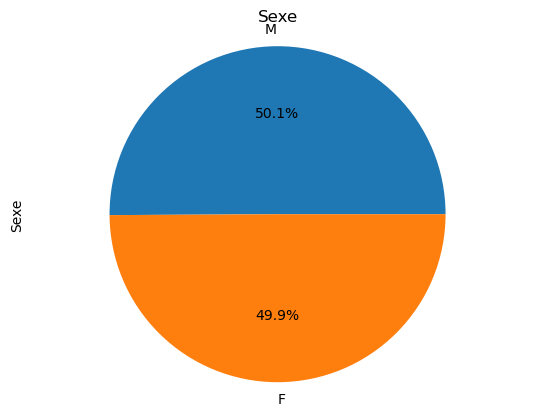

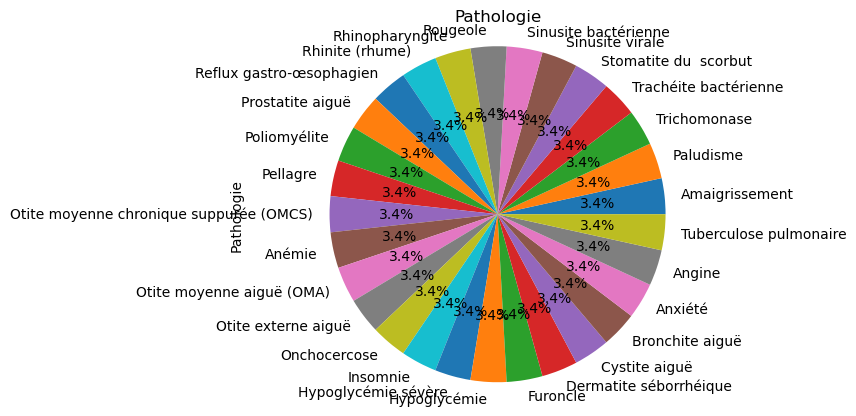

In [19]:
cols_ = ['Sexe','Pathologie']
for var in cols_:
    df[var].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

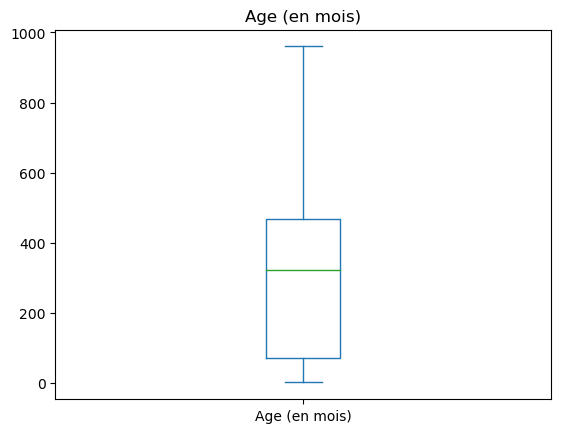

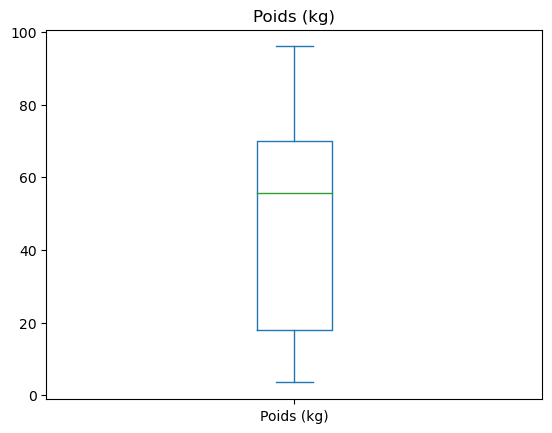

In [20]:
num_vars = ['Age (en mois)','Poids (kg)']

#generer un boxplot pour chaque variable quantitative
for var in num_vars:
    df[var].plot(kind='box')
    plt.title(var)
    plt.show()

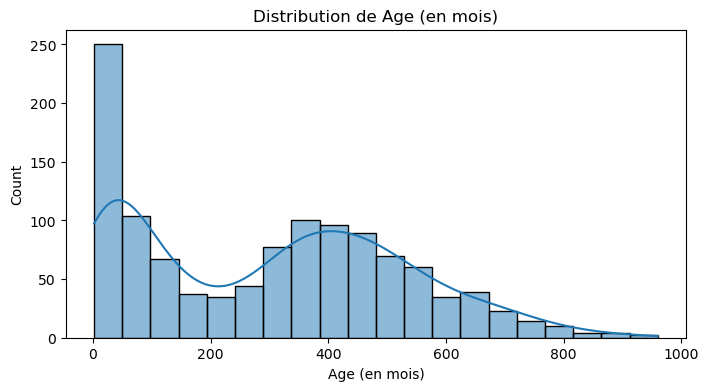

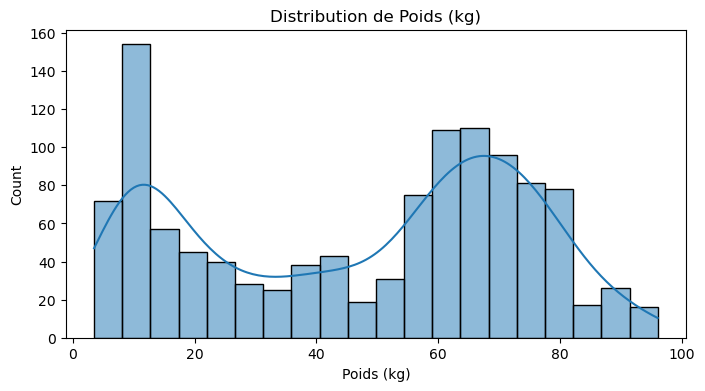

In [21]:
# Distribution des variables numériques
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


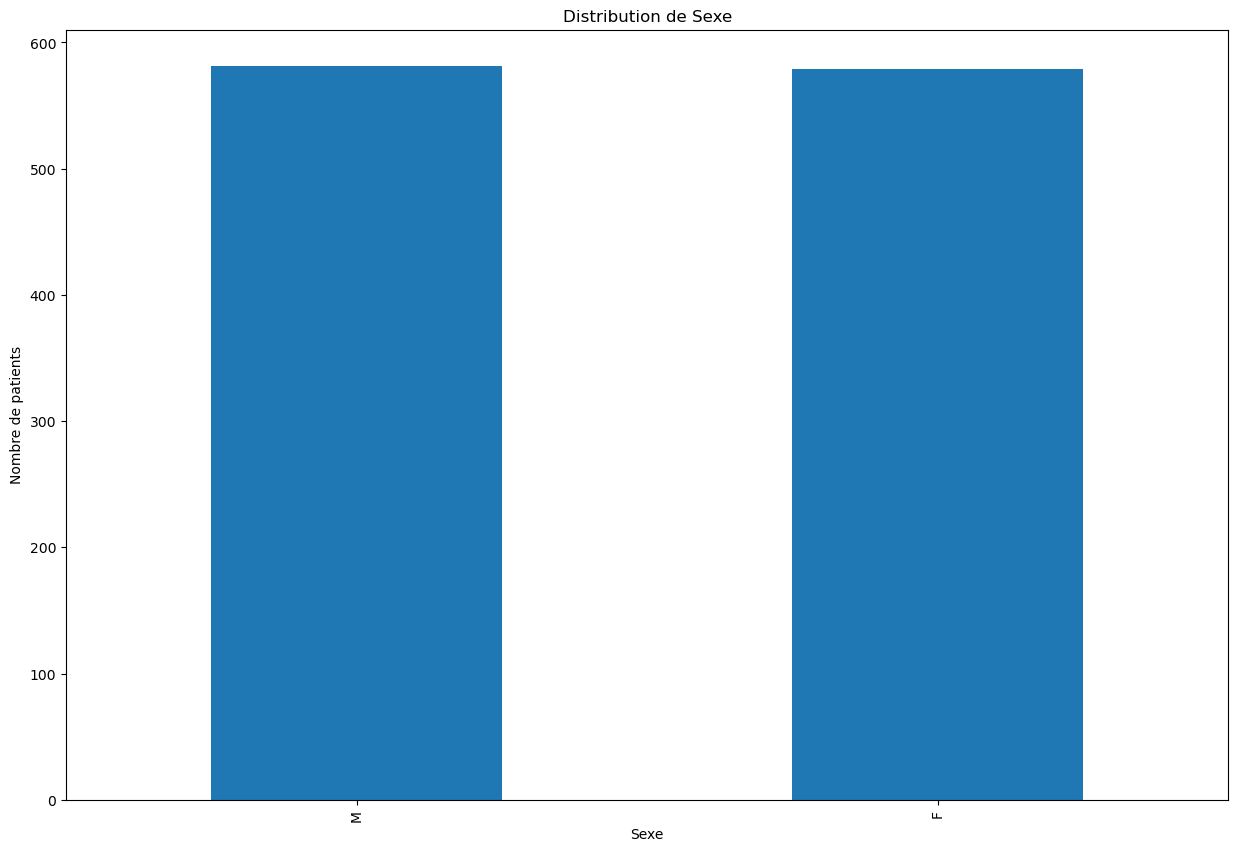

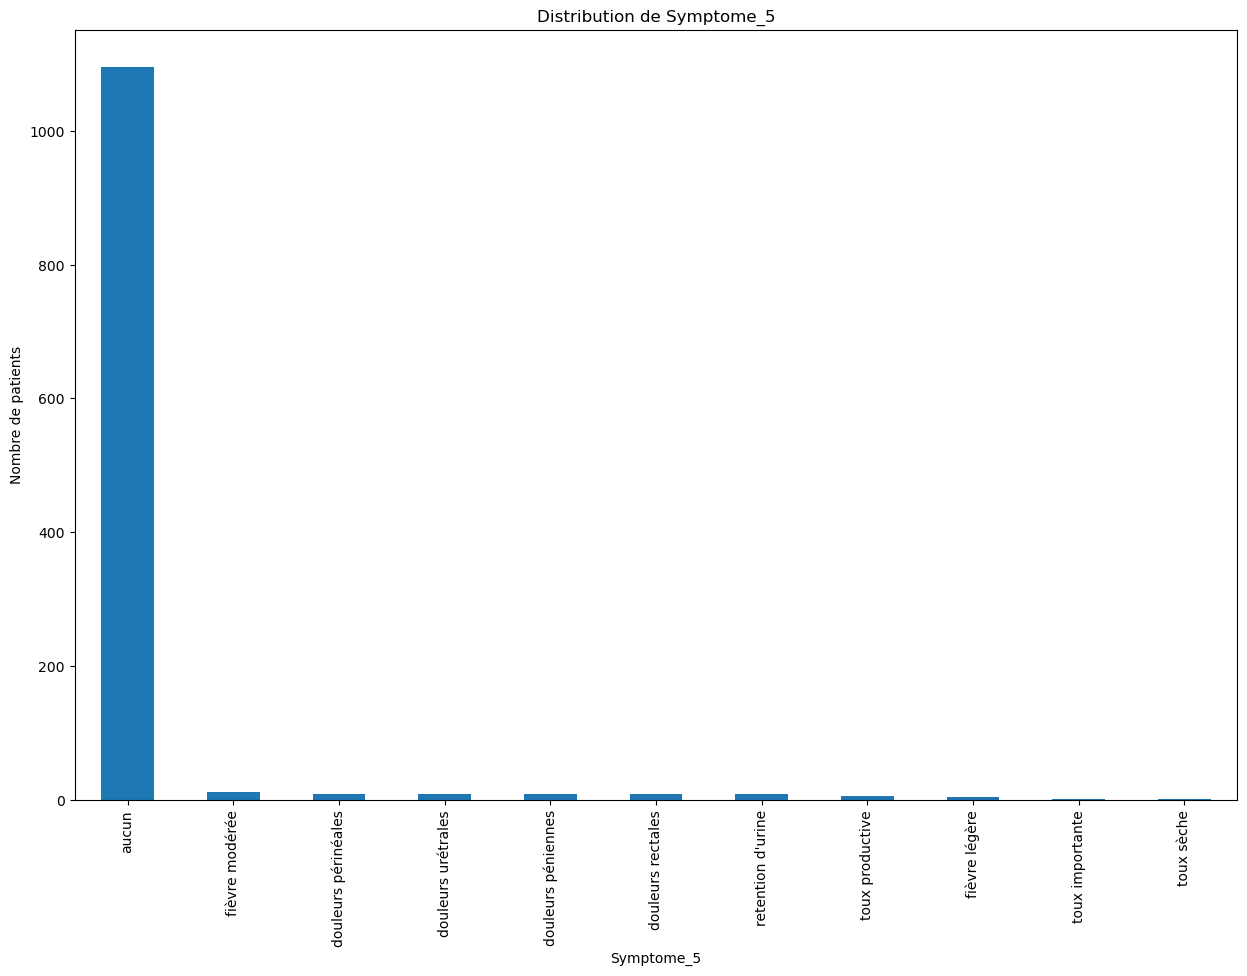

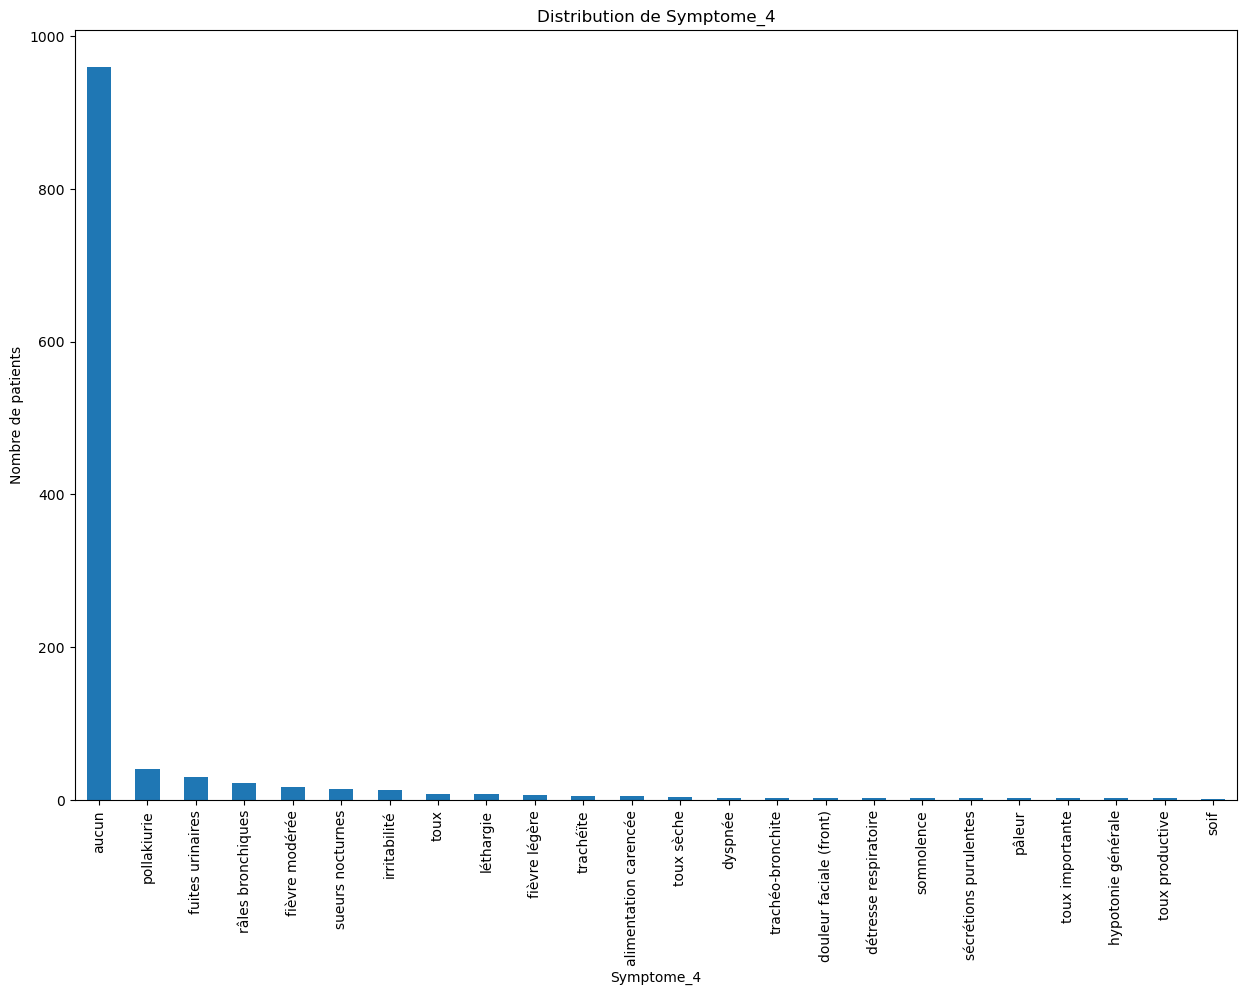

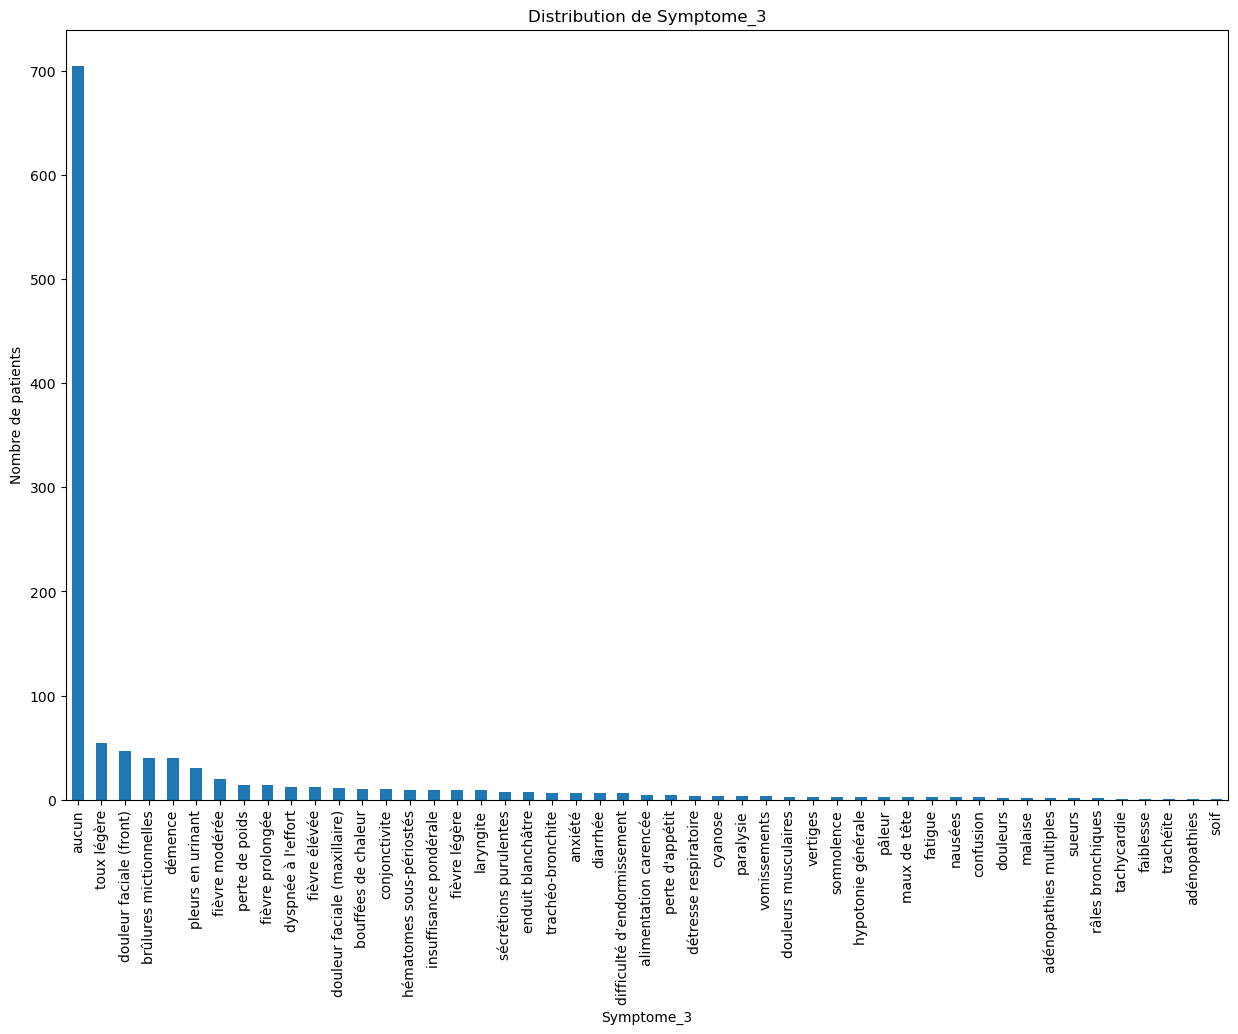

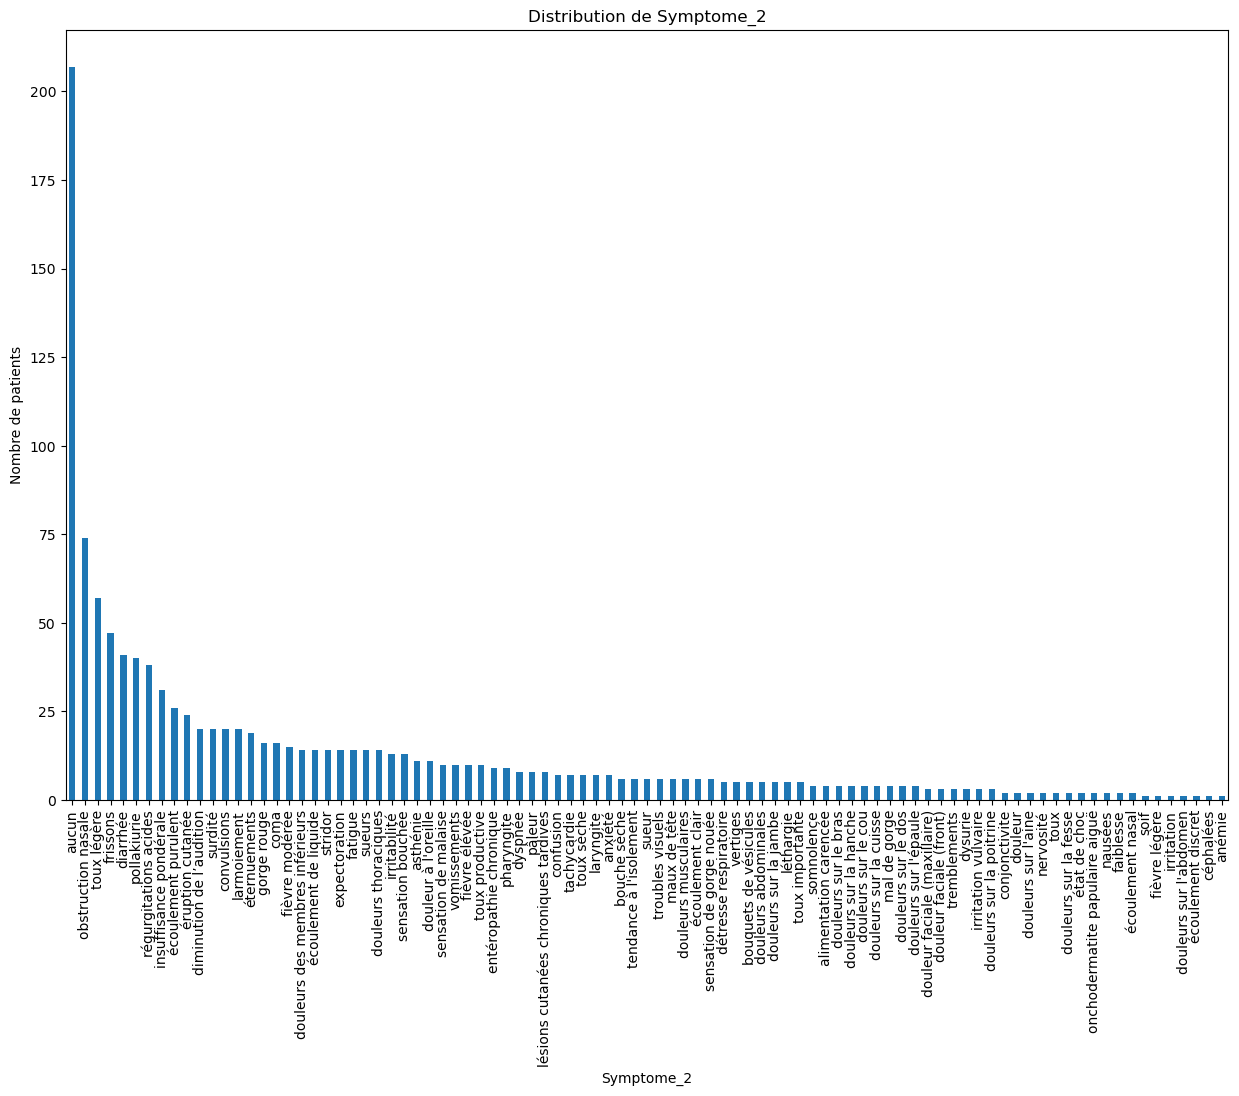

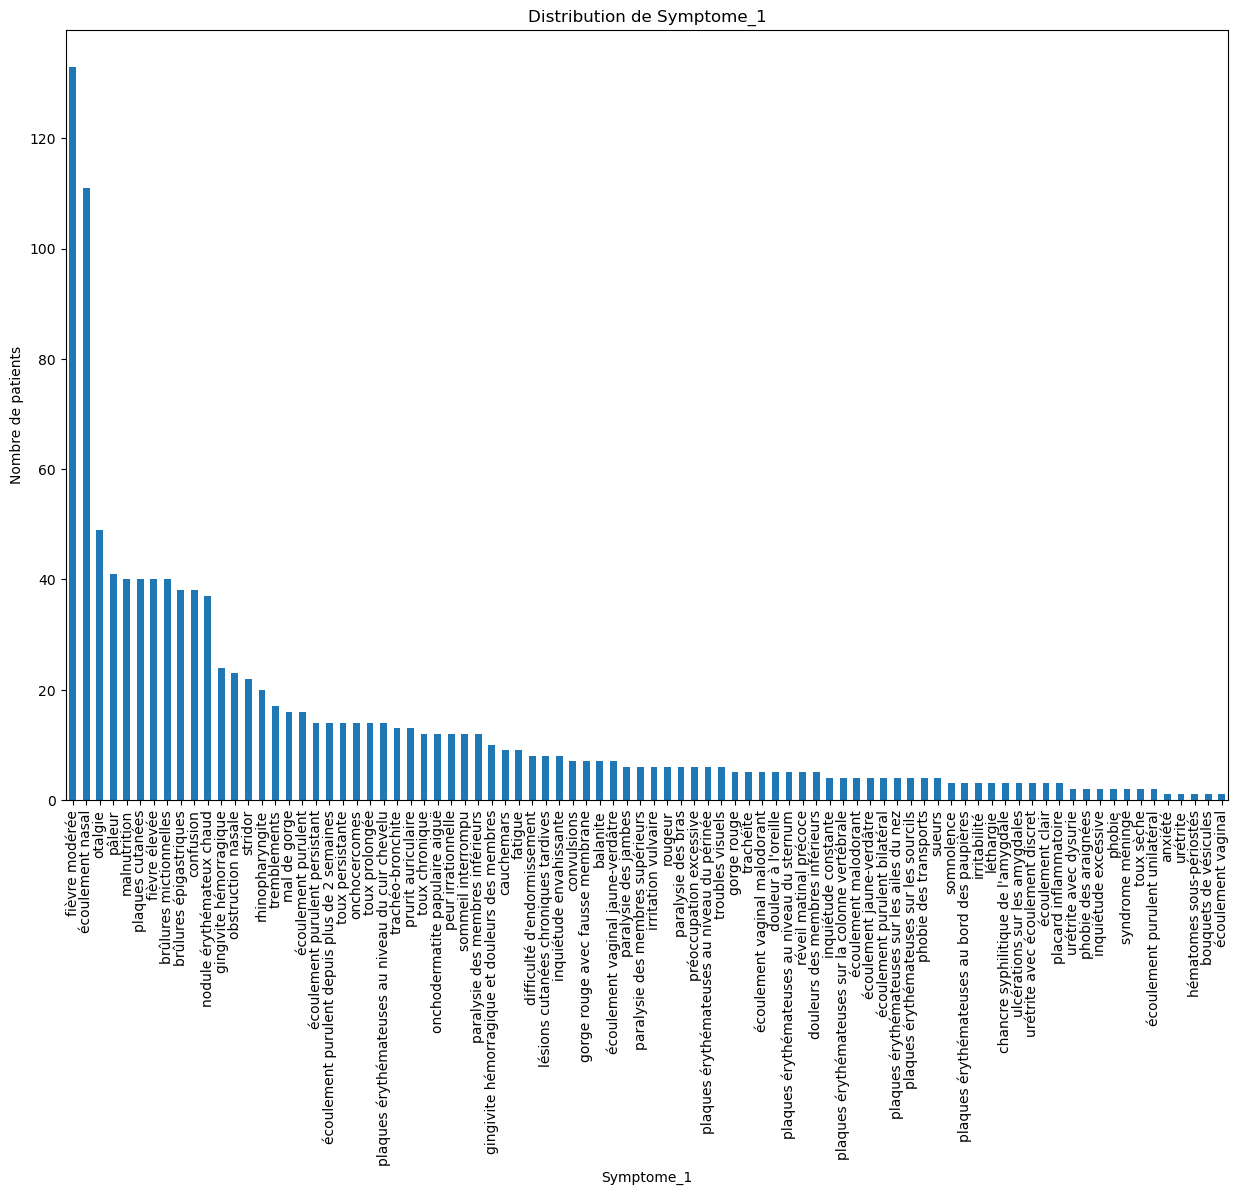

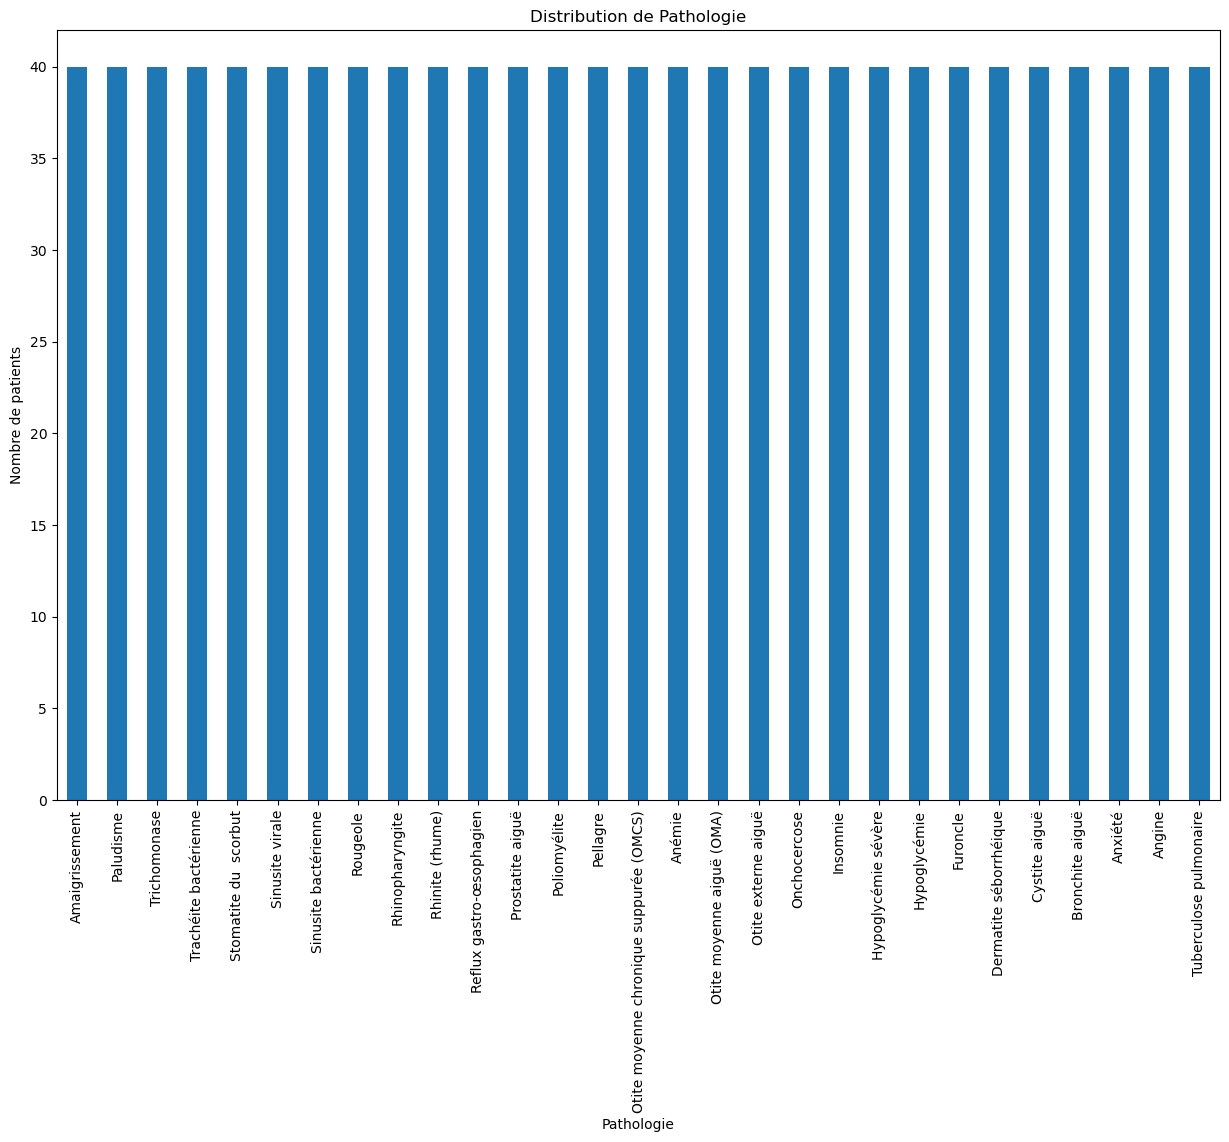

In [22]:
# Distribution des variables catégoriques (par exemple, le sexe)
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(15, 10))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution de {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Nombre de patients')
    plt.show()

## Analyse Bivariée

/var/folders/rd/408jh18j04b0rjlsj8z_718m0000gn/T/ipykernel_37847/200532960.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


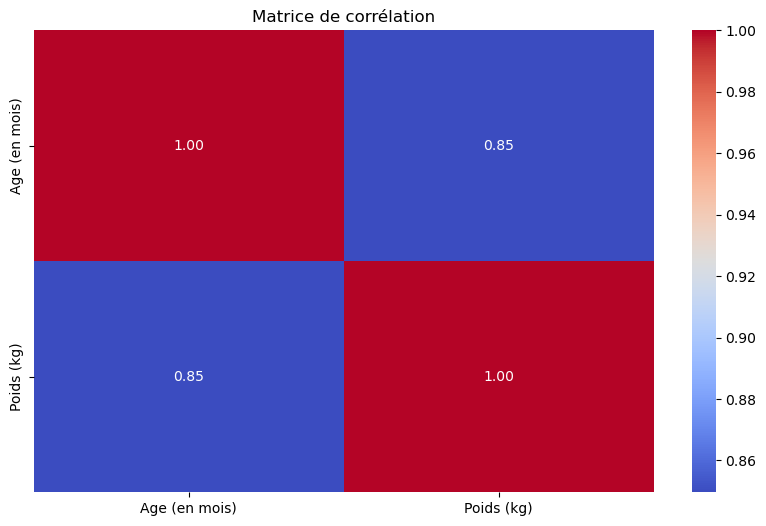

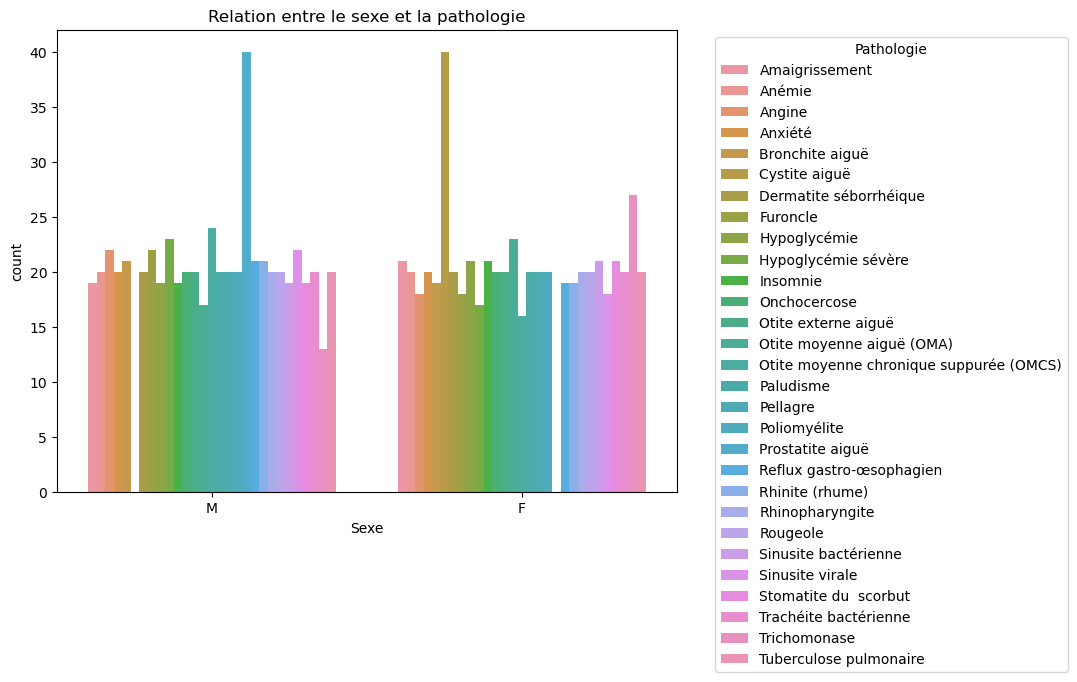

In [23]:
# Matrice de corrélation pour les variables numériques
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()



# Créez un diagramme en barres avec la légende
plt.figure(figsize=(8, 6))
sns.countplot(x='Sexe', hue='Pathologie', data=df)
plt.title('Relation entre le sexe et la pathologie')
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Le coefficient de corrélation positif (0.85) suggère que, en général, à mesure que l'âge en mois augmente, le poids en kg a tendance à augmenter également. Cela signifie qu'il existe une relation linéaire positive entre l'âge et le poids, ce qui est cohérent avec l'idée que les enfants ont tendance à prendre du poids à mesure qu'ils grandissent. Cette corrélation ne signifie pas nécessairement une relation de cause à effet. En d'autres termes, bien que l'âge et le poids soient corrélés, cela ne signifie pas que l'âge cause directement le poids à augmenter. D'autres facteurs peuvent également influencer le poids.

<Axes: xlabel='Age (en mois)', ylabel='Poids (kg)'>

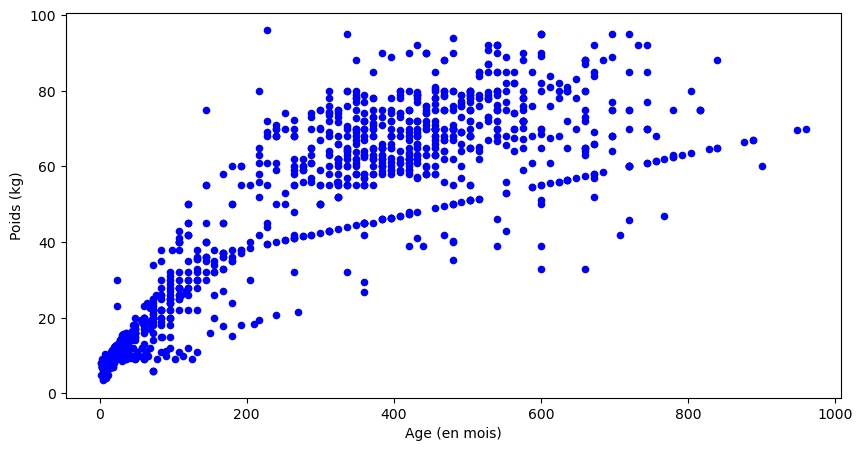

In [24]:
df.plot(x='Age (en mois)',y='Poids (kg)',kind='scatter',figsize =(10,5),c='blue')

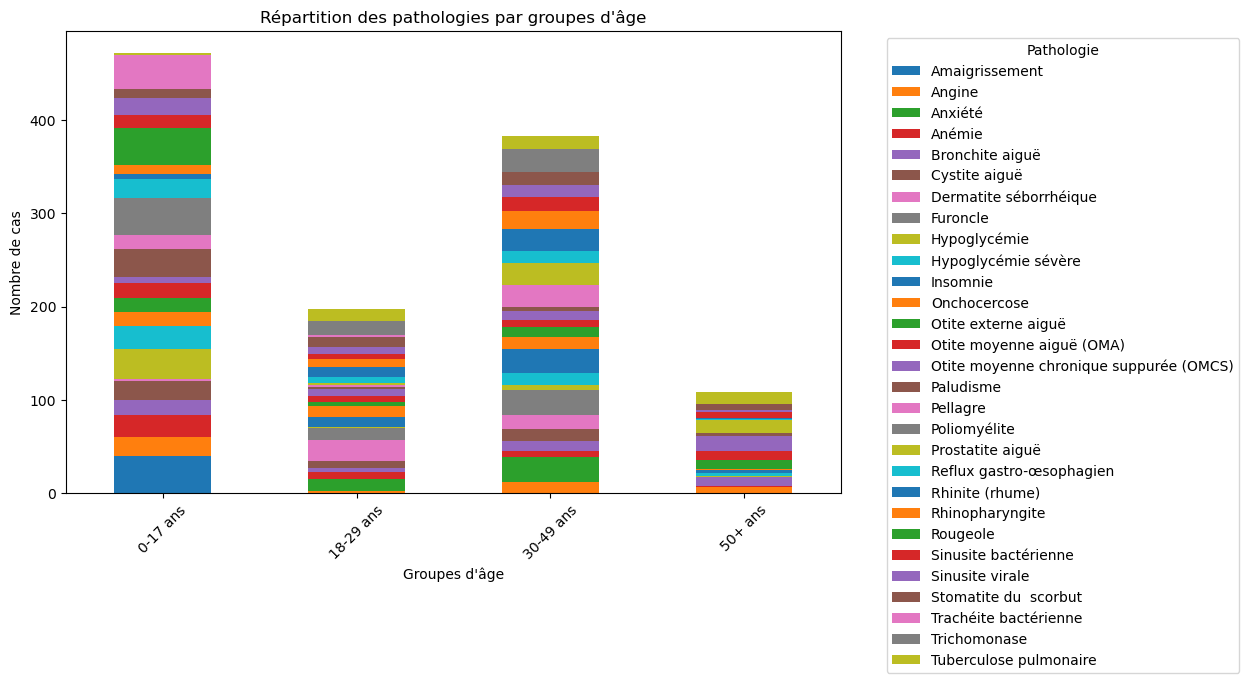

In [25]:
data=df
# Regroupez les données par classe de pathologie et calculez la distribution par groupes d'âge
age_bins = [0, 18, 30, 50, 100]  # Définissez les intervalles d'âge
age_labels = ["0-17 ans", "18-29 ans", "30-49 ans", "50+ ans"]
data['Age Group'] = pd.cut(data['Age (en mois)']/12, bins=age_bins, labels=age_labels)
age_pathology_counts = data.groupby(['Age Group', 'Pathologie']).size().unstack(fill_value=0)

# Créez un graphique à barres empilées
ax = age_pathology_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des pathologies par groupes d\'âge')
plt.xlabel('Groupes d\'âge')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)

# Déplacez la légende vers une position personnalisée
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

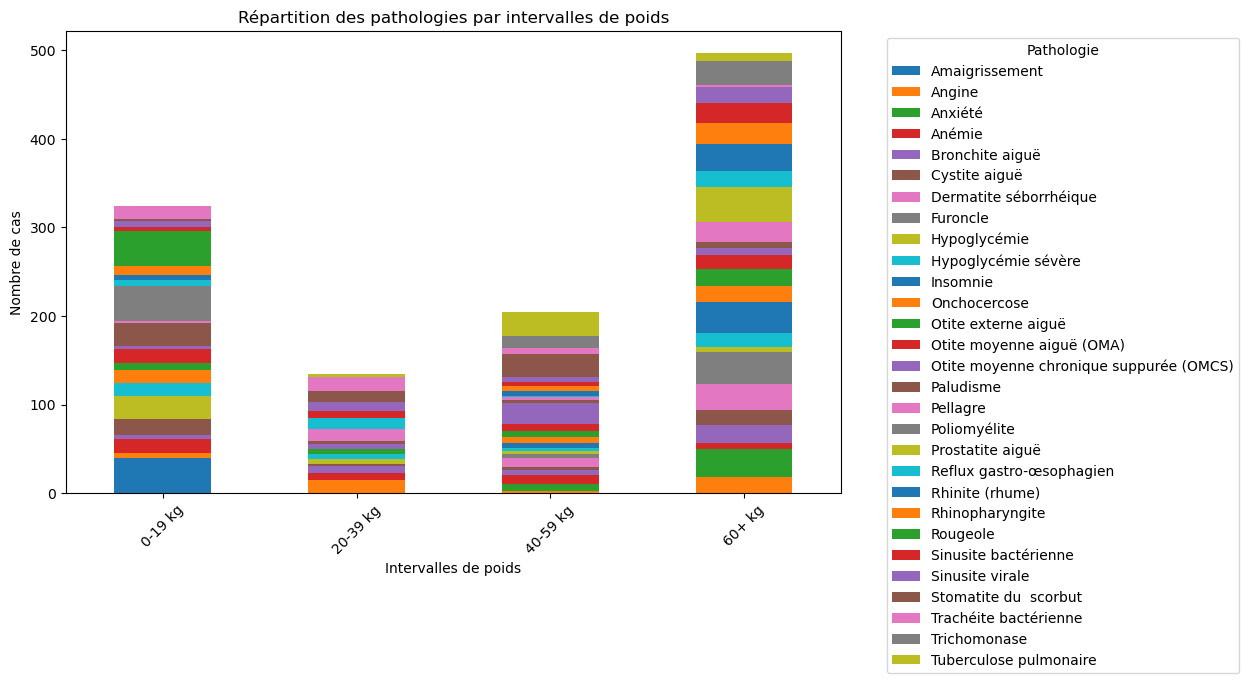

In [26]:
# Regroupez les données par classe de pathologie et calculez la distribution par intervalles de poids
weight_bins = [0, 20, 40, 60, 100]  # Définissez les intervalles de poids
weight_labels = ["0-19 kg", "20-39 kg", "40-59 kg", "60+ kg"]
data['Weight Group'] = pd.cut(data['Poids (kg)'], bins=weight_bins, labels=weight_labels)
weight_pathology_counts = data.groupby(['Weight Group', 'Pathologie']).size().unstack(fill_value=0)

# Créez un graphique à barres empilées
ax = weight_pathology_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des pathologies par intervalles de poids')
plt.xlabel('Intervalles de poids')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)

# Déplacez la légende vers une position personnalisée
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

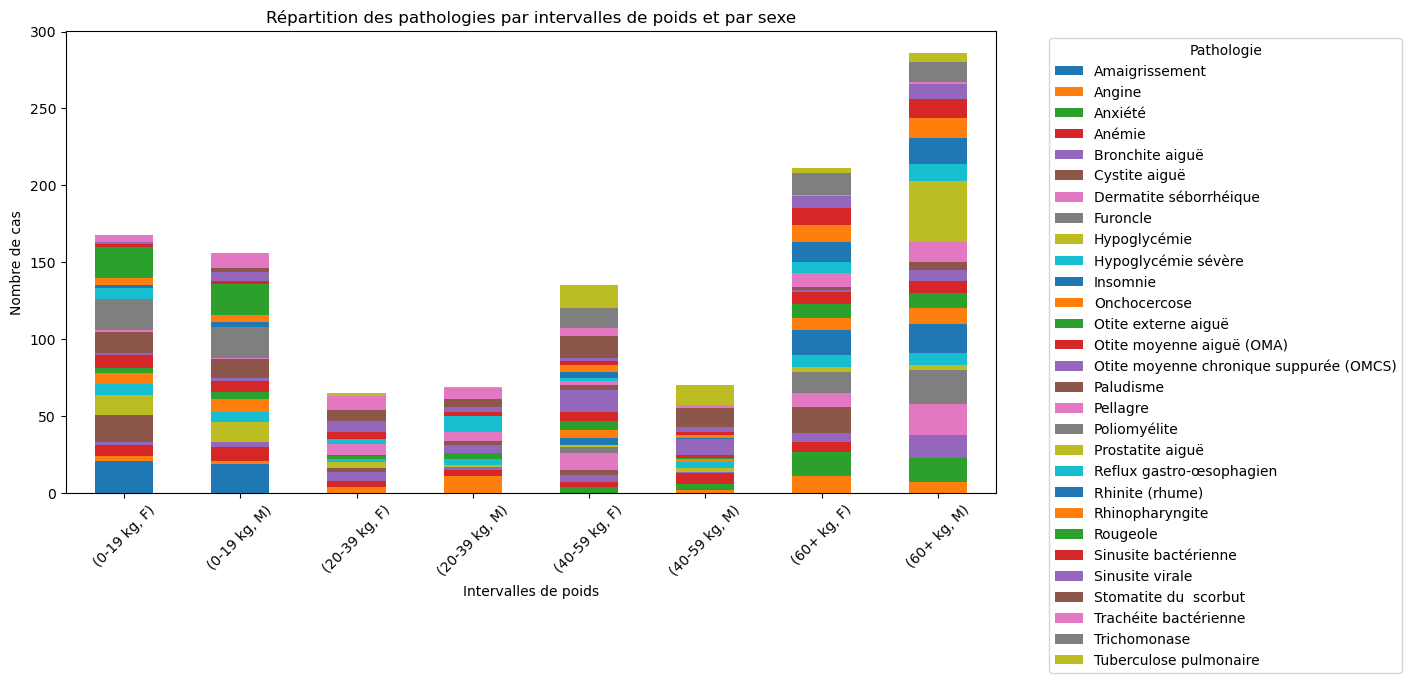

In [27]:

# Regroupez les données par classe de pathologie et calculez la distribution par intervalles de poids et par sexe
weight_bins = [0, 20, 40, 60, 100]  # Définissez les intervalles de poids
weight_labels = ["0-19 kg", "20-39 kg", "40-59 kg", "60+ kg"]
data['Weight Group'] = pd.cut(data['Poids (kg)'], bins=weight_bins, labels=weight_labels)
weight_sex_pathology_counts = data.groupby(['Weight Group', 'Sexe', 'Pathologie']).size().unstack(fill_value=0)

# Créez un graphique à barres empilées avec des sous-groupes pour le sexe
ax = weight_sex_pathology_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Répartition des pathologies par intervalles de poids et par sexe')
plt.xlabel('Intervalles de poids')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)

# Déplacez la légende vers une position personnalisée
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

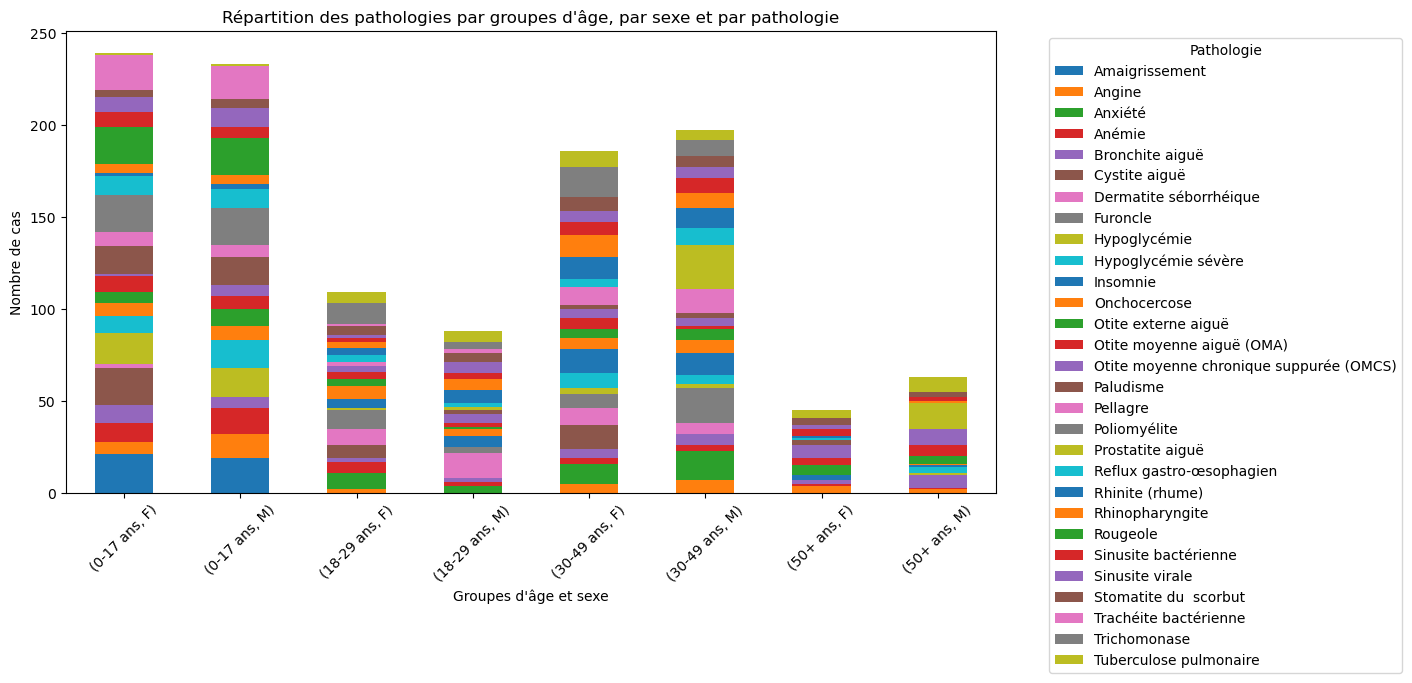

In [28]:
# Regroupez les données par classe de pathologie et calculez la distribution par groupes d'âge, par sexe et par pathologie
age_bins = [0, 18, 30, 50, 100]  # Définissez les intervalles d'âge
age_labels = ["0-17 ans", "18-29 ans", "30-49 ans", "50+ ans"]
data['Age Group'] = pd.cut(data['Age (en mois)']/12, bins=age_bins, labels=age_labels)
age_sex_pathology_counts = data.groupby(['Age Group', 'Sexe', 'Pathologie']).size().unstack(fill_value=0)

# Créez un graphique à barres empilées avec des sous-groupes pour l'âge et le sexe
ax = age_sex_pathology_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Répartition des pathologies par groupes d\'âge, par sexe et par pathologie')
plt.xlabel('Groupes d\'âge et sexe')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)

# Déplacez la légende vers une position personnalisée
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

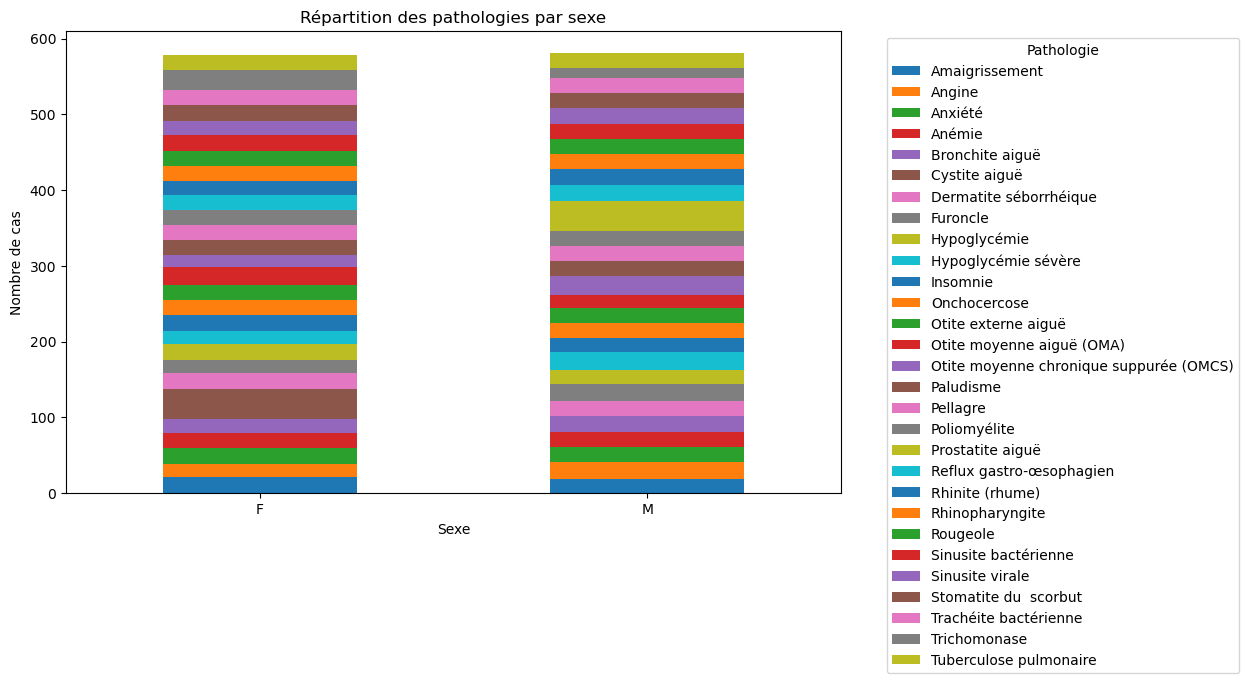

In [29]:
# Créez une table croisée entre le sexe et la pathologie
sex_pathology_counts = pd.crosstab(data['Sexe'], data['Pathologie'])

# Créez un graphique à barres empilées pour visualiser la répartition des pathologies par sexe
ax = sex_pathology_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des pathologies par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=0)

# Déplacez la légende vers une position personnalisée
plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

/Users/maestro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


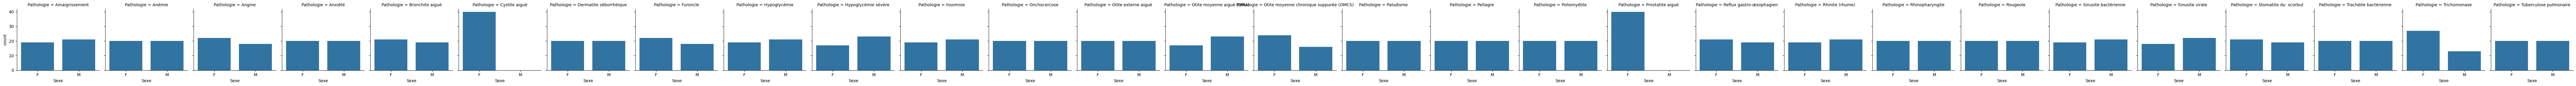

In [30]:
grid = sns.FacetGrid(df,col='Pathologie')
grid.map(sns.countplot,'Sexe')

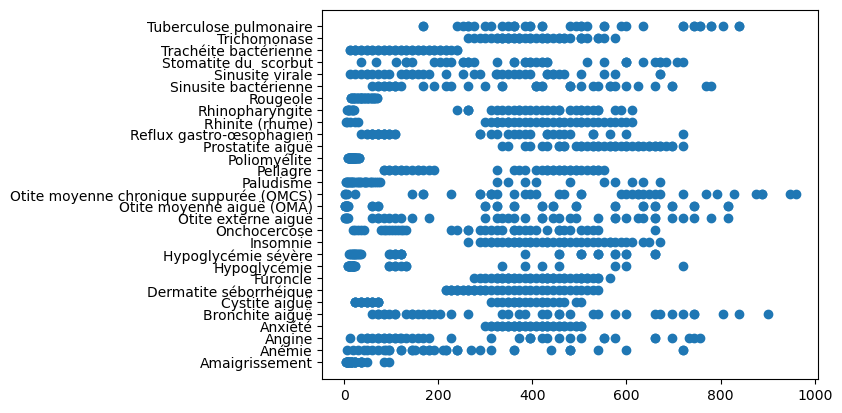

In [31]:
plt.scatter(df['Age (en mois)'],df['Pathologie'])

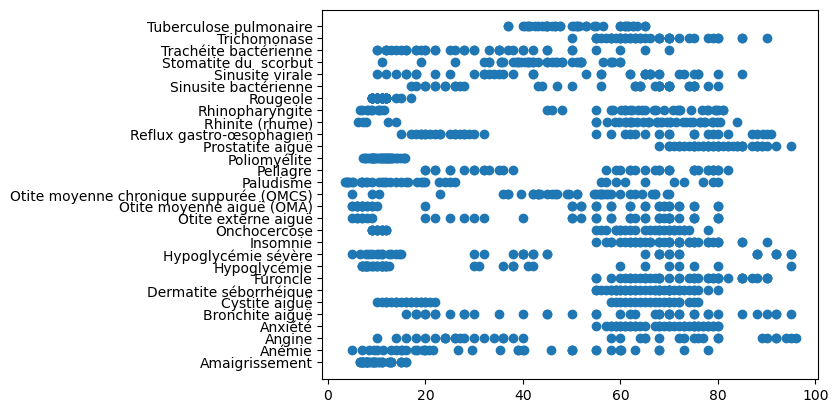

In [32]:
plt.scatter(df['Poids (kg)'],df['Pathologie'])

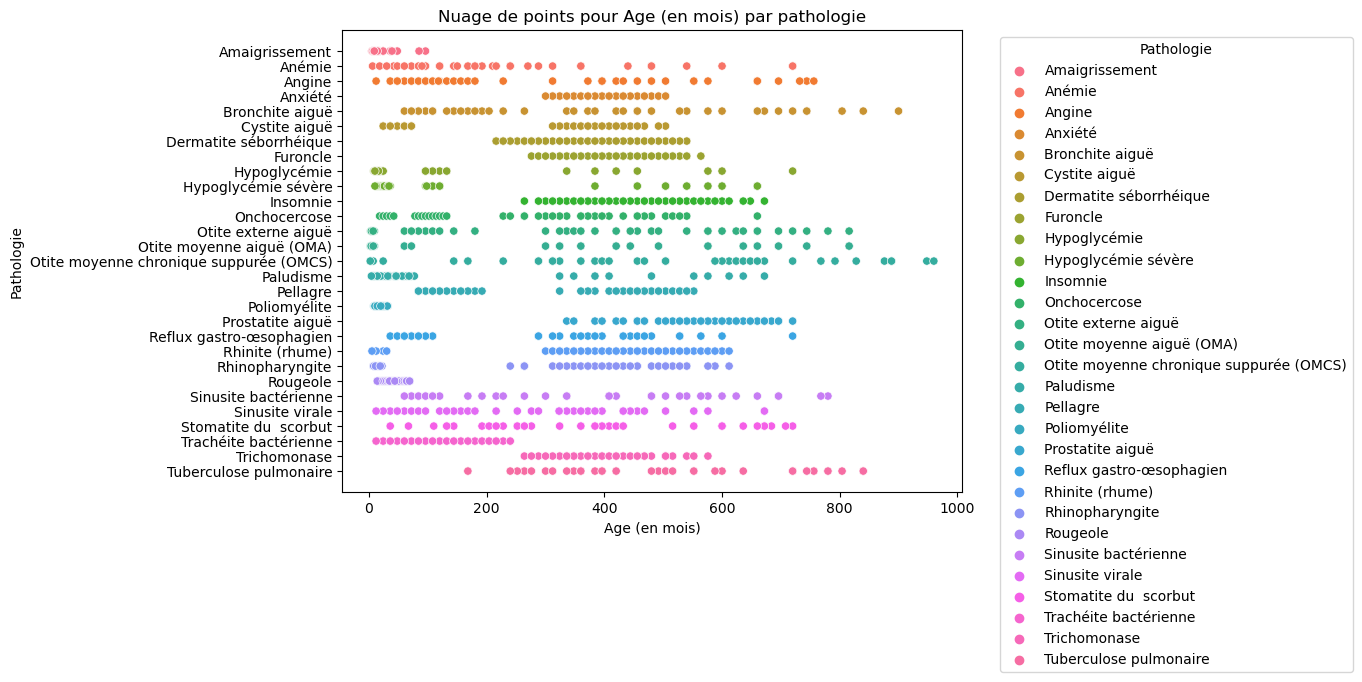

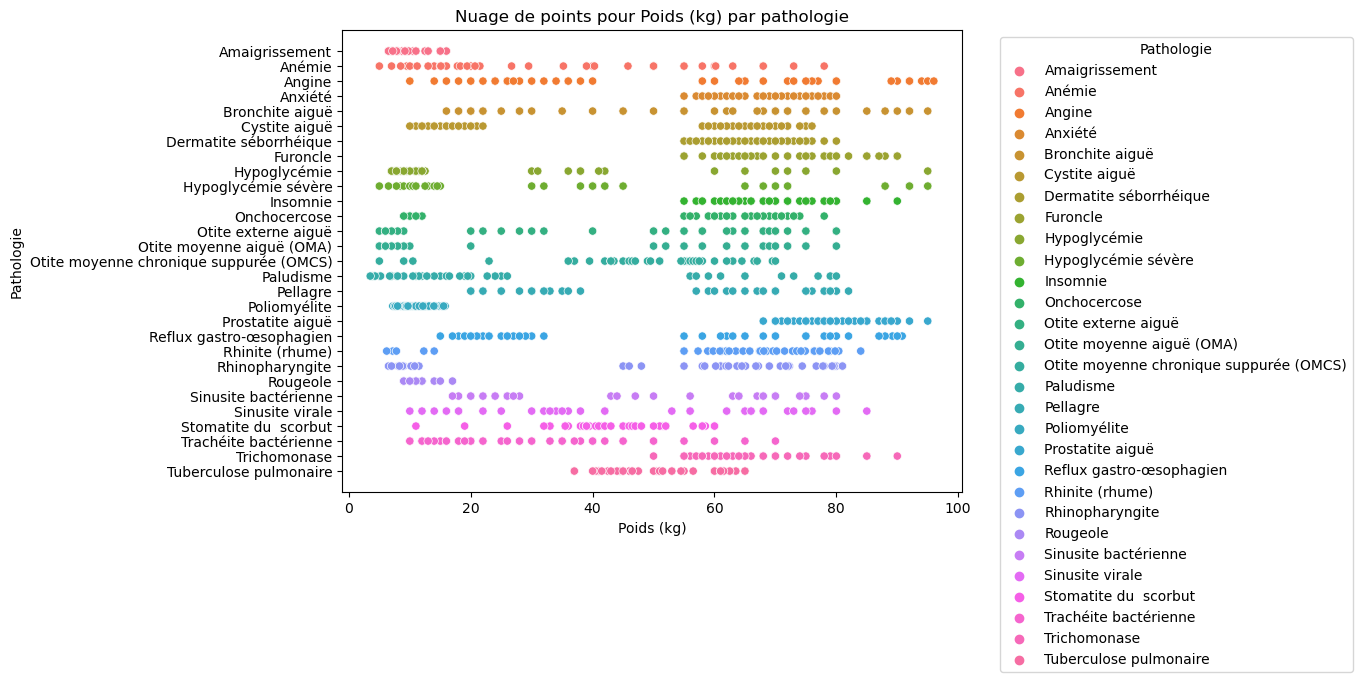

In [33]:

# Liste des variables continues
variables_continues = ['Age (en mois)', 'Poids (kg)']  # Ajoutez d'autres variables continues si nécessaire

# Créez une palette de couleurs différente pour chaque pathologie
palette = sns.color_palette("husl", n_colors=len(data['Pathologie'].unique()))

# Créez des graphiques de nuages de points distincts pour chaque variable
for variable in variables_continues:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=variable, y="Pathologie", hue="Pathologie", palette=palette)
    plt.title(f'Nuage de points pour {variable} par pathologie')
    plt.xlabel(variable)
    plt.ylabel('Pathologie')
    
    # Personnalisez la position de la légende
    plt.legend(title="Pathologie", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

In [34]:
import scipy.stats as stats

# Créez un DataFrame pour stocker les résultats
chi2_results = pd.DataFrame(columns=['Variable', 'Statistique du Chi2', 'Valeur p'])

for col in df.select_dtypes(include=['object']).columns:
    if col != 'Pathologie':
        # Créez un tableau de contingence (tableau croisé) entre les deux variables
        contingency_table = pd.crosstab(df[col], df['Pathologie'])

        # Effectuez le test du Chi2
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)

        # Ajoutez les résultats au DataFrame
        chi2_results = chi2_results.append({'Variable': col, 'Statistique du Chi2': chi2, 'Valeur p': p}, ignore_index=True)

# Affichez les résultats
print(chi2_results)

     Variable  Statistique du Chi2       Valeur p
0        Sexe            90.296820   1.781687e-08
1  Symptome_5          1684.399027  9.232399e-199
2  Symptome_4          5572.289583   0.000000e+00
3  Symptome_3         10993.420653   0.000000e+00
4  Symptome_2         22711.854546   0.000000e+00
5  Symptome_1         26055.401698   0.000000e+00


/var/folders/rd/408jh18j04b0rjlsj8z_718m0000gn/T/ipykernel_37847/3816724192.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_results = chi2_results.append({'Variable': col, 'Statistique du Chi2': chi2, 'Valeur p': p}, ignore_index=True)
/var/folders/rd/408jh18j04b0rjlsj8z_718m0000gn/T/ipykernel_37847/3816724192.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_results = chi2_results.append({'Variable': col, 'Statistique du Chi2': chi2, 'Valeur p': p}, ignore_index=True)
/var/folders/rd/408jh18j04b0rjlsj8z_718m0000gn/T/ipykernel_37847/3816724192.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_results = chi2_results.append({'Variable': col, 'Statistique du Chi2': chi2, 'Valeur p': p}, ignore_index=T